
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-05-26<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Wed Jun 17 12:55:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data
/content


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [3]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3-master
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master
checkpoints	     IMAGES	 README.md	   wget.exe
detection_custom.py  log	 requirements.txt  yolov3
detection_demo.py    mnist	 tools		   YOLOv3_colab_training.ipynb
detect_mnist.py      model_data  train.py


**Install all required libraries for our project:**

In [4]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 1.2MB 19.9MB/s 
     |████████████████████████████████| 6.3MB 56.2MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=78b20ce1824b7dd130cf56470b1bd9cee681afb1a49bcb9d67849c285f5f6dfa
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
  Created wheel for awscli: filename=awscli-1.18.81-py2.py3-none-any.whl size=3171807 sha256=40726ba660a2a4fdd632a18a9d1b4deab6728750d0a08ed2e385e68dadca06b2
  Stored in directory: /root/.cache/pip/wheels/96/04/36/714cf71fd4a44ed1d0f03987a2f229267db76f186fd0586128
Successfully built wget awscli
ERROR: boto3 1.13.23 has requirement botocore<1.17.0,>=1.16.23, but you'll have botocore 1.17.4 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.

**Download yolov3.weights if you don't have it:**

In [ ]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.2.0
'/device:GPU:0'
```

In [5]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.2.0


'/device:GPU:0'

**Test by loading trained model:**

In [6]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov3 import Create_Yolov3
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

input_size = YOLO_INPUT_SIZE
Darknet_weights = YOLO_DARKNET_WEIGHTS

yolo = Create_Yolov3(input_size=input_size)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

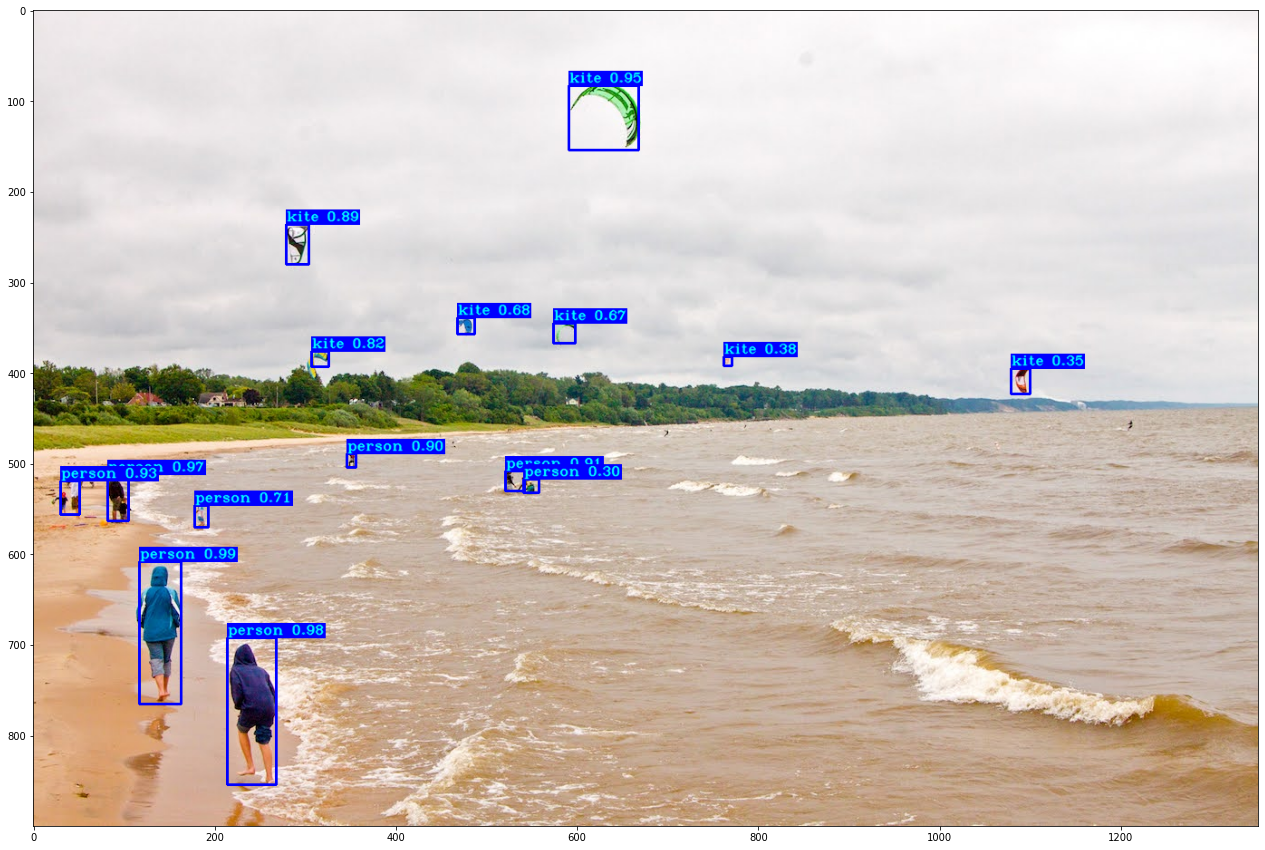

In [7]:
image_path   = "./IMAGES/kite.jpg"

image = detect_image(yolo, image_path, '', input_size=input_size, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

**create training data:**

**Start training custom model:**

In [12]:
TRAIN_EPOCHS = 3

In [38]:
TRAIN_YOLO_TINY

True

In [16]:
TRAIN_FROM_CHECKPOINT

False

In [44]:
!python train2.py

Streaming output truncated to the last 5000 lines.
epoch:61 step:   73/125, lr:0.000034, giou_loss:   2.40, conf_loss:   0.41, prob_loss:   2.47, total_loss:   5.28
epoch:61 step:   74/125, lr:0.000034, giou_loss:   1.63, conf_loss:   0.26, prob_loss:   1.84, total_loss:   3.73
epoch:61 step:   75/125, lr:0.000034, giou_loss:   2.63, conf_loss:   0.54, prob_loss:   2.56, total_loss:   5.74
epoch:61 step:   76/125, lr:0.000034, giou_loss:   2.31, conf_loss:   0.56, prob_loss:   2.46, total_loss:   5.33
epoch:61 step:   77/125, lr:0.000034, giou_loss:   1.77, conf_loss:   0.31, prob_loss:   1.87, total_loss:   3.94
epoch:61 step:   78/125, lr:0.000034, giou_loss:   1.56, conf_loss:   0.16, prob_loss:   2.16, total_loss:   3.88
epoch:61 step:   79/125, lr:0.000034, giou_loss:   1.64, conf_loss:   0.11, prob_loss:   1.62, total_loss:   3.37
epoch:61 step:   80/125, lr:0.000034, giou_loss:   1.73, conf_loss:   0.08, prob_loss:   1.47, total_loss:   3.27
epoch:61 step:   81/125, lr:0.000034,

**Create Yolo v3 custom model and load custom trained weights**

In [41]:
!tensorboard --logdir ./log

2020-06-17 15:16:11.706332: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.2 at http://localhost:6006/ (Press CTRL+C to quit)
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3.6/concurrent/futures/thread.py", line 33, in _python_exit
    def _python_exit():
KeyboardInterrupt


**Test the detection with `IMAGES/plate_2.jpg` image**

In [1]:
!python detect_mnist.py

python3: can't open file 'detect_mnist.py': [Errno 2] No such file or directory


In [3]:
!pwd
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3-master
!ls

/content
[Errno 2] No such file or directory: 'gdrive/My Drive/TensorFlow-2.x-YOLOv3-master'
/content
sample_data
